In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Notes: https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7

In [2]:
#Import the API Key
data_df = pd.read_csv(r"Resources\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20231101.csv")
#Add calculated number of obese people
data_df['calculated_num_obese'] = round(data_df['Sample_Size'] * data_df['Data_Value'] * .01)

In [3]:
list_of_categories = data_df['StratificationCategory1'].unique()
list_of_categories

array(['Race/Ethnicity', 'Education', 'Income', 'Age (years)', 'Gender',
       'Total', nan], dtype=object)

In [4]:
# Convert data into a Pandas DataFrame
data_df = data_df[['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','Race/Ethnicity','Education','Gender','StratificationCategory1','Stratification1']]

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  88629 non-null  int64  
 1   LocationAbbr             88629 non-null  object 
 2   Question                 88629 non-null  object 
 3   Data_Value               79851 non-null  float64
 4   Sample_Size              79851 non-null  float64
 5   Race/Ethnicity           25320 non-null  object 
 6   Education                12660 non-null  object 
 7   Gender                   6330 non-null   object 
 8   StratificationCategory1  88620 non-null  object 
 9   Stratification1          88620 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.8+ MB


In [5]:
#These are the questions this dataset answers
list_of_questions = data_df['Question'].unique()
print(sorted(list_of_questions))

['Percent of adults aged 18 years and older who have an overweight classification', 'Percent of adults aged 18 years and older who have obesity', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who engage in no leisure-time physical activity', 'Percent of adults who report consuming fru

In [6]:
#overweight_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have an overweight classification']

In [7]:
#obese_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

In [8]:
#dataframe for obese by age groups
age_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

age_data_df = age_data_df[age_data_df['YearEnd']==2020]
age_data_df = age_data_df[age_data_df['LocationAbbr']=='US']
age_data_df = age_data_df[age_data_df['StratificationCategory1']=='Age (years)']
age_data_df = age_data_df[age_data_df['Question']=='Percent of adults aged 18 years and older who have obesity']
age_data_df = age_data_df.sort_values(by='Stratification1', ascending=True)

age_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
8846,2020,US,Percent of adults aged 18 years and older who ...,19.5,22611.0,Age (years),18 - 24
7438,2020,US,Percent of adults aged 18 years and older who ...,30.9,38280.0,Age (years),25 - 34
7159,2020,US,Percent of adults aged 18 years and older who ...,35.5,44948.0,Age (years),35 - 44
8601,2020,US,Percent of adults aged 18 years and older who ...,38.1,52842.0,Age (years),45 - 54
10441,2020,US,Percent of adults aged 18 years and older who ...,36.3,69210.0,Age (years),55 - 64
6597,2020,US,Percent of adults aged 18 years and older who ...,29.3,125950.0,Age (years),65 or older


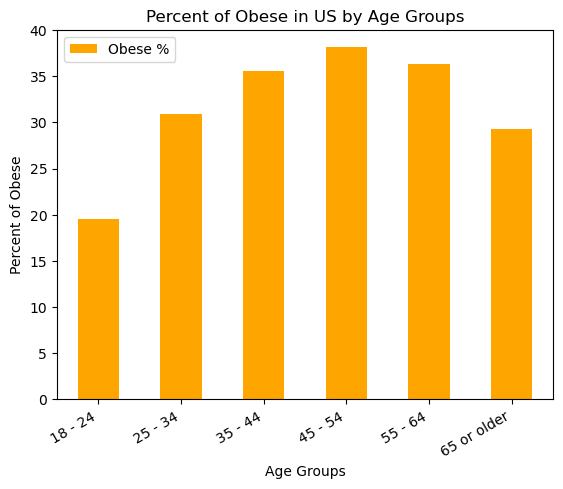

In [48]:
#Bar Chart for Percent of obese in US by Age Groups
age_data_df.plot.bar(x='Stratification1', y='Data_Value', color='orange')

plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Percent of Obese in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")
plt.legend(['Obese %'], loc="upper left")

plt.savefig("Images/Obesity_AgeGroups_US.png")
plt.show()

In [10]:
#dataframe for overweight by age groups
age_data_overweight_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['YearEnd']==2020]
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['LocationAbbr']=='US']
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['StratificationCategory1']=='Age (years)']
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['Question']=='Percent of adults aged 18 years and older who have an overweight classification']
age_data_overweight_df = age_data_overweight_df.sort_values(by='Stratification1', ascending=True)

age_data_overweight_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
6868,2020,US,Percent of adults aged 18 years and older who ...,26.6,22611.0,Age (years),18 - 24
8143,2020,US,Percent of adults aged 18 years and older who ...,32.7,38280.0,Age (years),25 - 34
6673,2020,US,Percent of adults aged 18 years and older who ...,34.8,44948.0,Age (years),35 - 44
5650,2020,US,Percent of adults aged 18 years and older who ...,36.2,52842.0,Age (years),45 - 54
9686,2020,US,Percent of adults aged 18 years and older who ...,37.1,69210.0,Age (years),55 - 64
8413,2020,US,Percent of adults aged 18 years and older who ...,38.4,125950.0,Age (years),65 or older


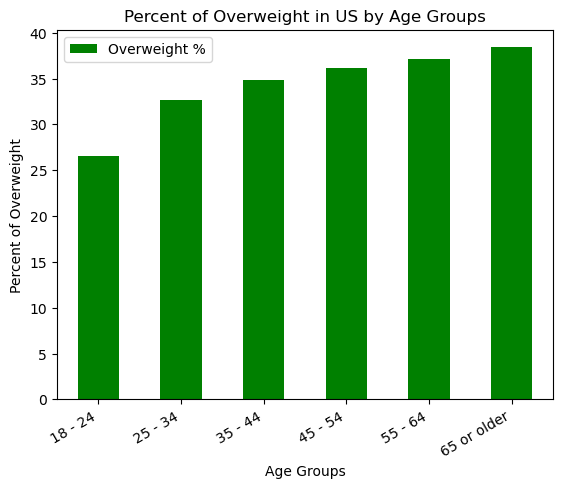

In [47]:
#Bar Chart for Percent of overweight in US by Age Groups
age_data_overweight_df.plot.bar(x='Stratification1', y='Data_Value', color='green')

plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Percent of Overweight in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Overweight")
plt.legend(['Overweight %'], loc="upper left")

plt.savefig("Images/Obesity_Overweight_US.png")
plt.show()

In [12]:
#data frame for Question "Percent of adults who engage in no leisure-time physical activity"
leisure_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

leisure_data_df = leisure_data_df[leisure_data_df['YearEnd']==2020]
leisure_data_df = leisure_data_df[leisure_data_df['LocationAbbr']=='US']
leisure_data_df = leisure_data_df[leisure_data_df['StratificationCategory1']=='Income']
leisure_data_df = leisure_data_df[leisure_data_df['Question']== 'Percent of adults who engage in no leisure-time physical activity']
leisure_data_df = leisure_data_df.sort_values(by='Stratification1', ascending=True)

#Removing the "data not reported category"
leisure_data_df = leisure_data_df.drop(9964, axis=0)
leisure_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
6076,2020,US,Percent of adults who engage in no leisure-tim...,34.0,47033.0,Income,"$15,000 - $24,999"
10242,2020,US,Percent of adults who engage in no leisure-tim...,29.8,30688.0,Income,"$25,000 - $34,999"
9171,2020,US,Percent of adults who engage in no leisure-tim...,24.2,43184.0,Income,"$35,000 - $49,999"
7984,2020,US,Percent of adults who engage in no leisure-tim...,20.4,51926.0,Income,"$50,000 - $74,999"
9015,2020,US,Percent of adults who engage in no leisure-tim...,12.7,117926.0,Income,"$75,000 or greater"
7603,2020,US,Percent of adults who engage in no leisure-tim...,40.1,24882.0,Income,"Less than $15,000"


In [13]:
#Adjusting the index to get the Stratification1 column in order.
target_row = 5
idx = [target_row] + [i for i in range(len(leisure_data_df)) if i != target_row]
leisure_data_df.iloc[idx]

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
7603,2020,US,Percent of adults who engage in no leisure-tim...,40.1,24882.0,Income,"Less than $15,000"
6076,2020,US,Percent of adults who engage in no leisure-tim...,34.0,47033.0,Income,"$15,000 - $24,999"
10242,2020,US,Percent of adults who engage in no leisure-tim...,29.8,30688.0,Income,"$25,000 - $34,999"
9171,2020,US,Percent of adults who engage in no leisure-tim...,24.2,43184.0,Income,"$35,000 - $49,999"
7984,2020,US,Percent of adults who engage in no leisure-tim...,20.4,51926.0,Income,"$50,000 - $74,999"
9015,2020,US,Percent of adults who engage in no leisure-tim...,12.7,117926.0,Income,"$75,000 or greater"


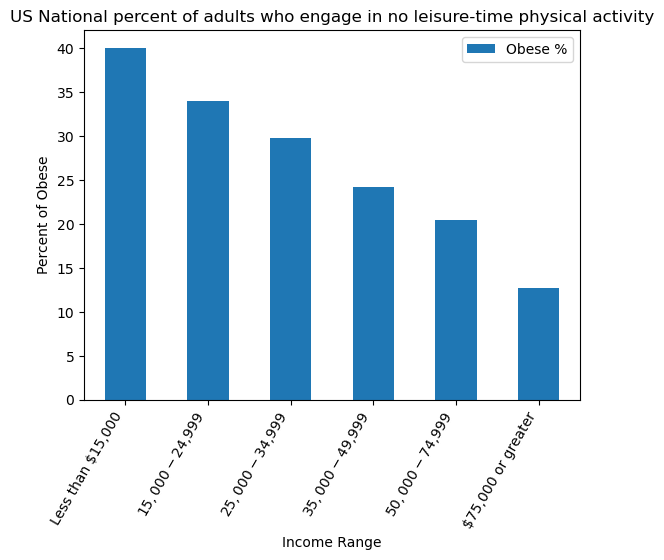

In [46]:
#Bar chart for no leisure-time activity
leisure_data_df.iloc[idx].plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=60, horizontalalignment="right")
plt.title("US National percent of adults who engage in no leisure-time physical activity")
plt.xlabel("Income Range")
plt.ylabel("Percent of Obese")
plt.legend(['Obese %'], loc="upper right")

plt.savefig("Images/Obesity_No_Leisure_US.png")
plt.show()

In [15]:
obese_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
obese_df = obese_df[obese_df['YearEnd'] == 2020]
obese_df = obese_df[obese_df['LocationAbbr'] != 'US']
obese_df = obese_df[obese_df['LocationAbbr'] != 'VI']
obese_df = obese_df[obese_df['LocationAbbr'] != 'GU']
obese_df = obese_df[obese_df['LocationAbbr'] != 'DC']
obese_df = obese_df[obese_df['LocationAbbr'] != 'PR']
obese_df = obese_df[obese_df['StratificationCategory1'] == 'Total']
obese_df = obese_df[obese_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

obese_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
429,2020,AK,Percent of adults aged 18 years and older who ...,31.9,3335.0,Total,Total
5621,2020,MD,Percent of adults aged 18 years and older who ...,31.0,12562.0,Total,Total
5710,2020,VA,Percent of adults aged 18 years and older who ...,32.2,8568.0,Total,Total
5981,2020,OK,Percent of adults aged 18 years and older who ...,36.4,4530.0,Total,Total
6125,2020,FL,Percent of adults aged 18 years and older who ...,28.4,10591.0,Total,Total


In [55]:
#https://stackoverflow.com/questions/65926926/plotly-blank-choropleth-map-after-exporting-to-html
#https://plotly.com/python/choropleth-maps/

fig = px.choropleth(obese_df,
                    locations= obese_df['LocationAbbr'],
                    color= obese_df['Data_Value'],
                    color_continuous_scale='spectral_r',
                    hover_name=obese_df['LocationAbbr'],
                    locationmode='USA-states',
                    labels={'Obesity %'},
                    scope='usa')

fig.add_scattergeo(
    #locations=obese_df['LocationAbbr'],
    locationmode='USA-states',
    text=obese_df['LocationAbbr'],
    mode='text')

fig.update_layout(
    title={'text':'2020 Obesity Rates %',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()
fig.write_html("Images/Obesity_US_Map.html")

In [17]:
list_of_questions = obese_df['StratificationCategory1'].unique()
print(sorted(list_of_questions))

['Total']


In [18]:
timeline_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

timeline_df = timeline_df[timeline_df['LocationAbbr'] == 'US']
timeline_df = timeline_df[timeline_df['StratificationCategory1'] == 'Total']
timeline_df = timeline_df[timeline_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']
timeline_df = timeline_df.sort_values(by='YearEnd', ascending=True)

timeline_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
3149,2011,US,Percent of adults aged 18 years and older who ...,27.4,470700.0,Total,Total
10470,2012,US,Percent of adults aged 18 years and older who ...,27.7,442230.0,Total,Total
7611,2013,US,Percent of adults aged 18 years and older who ...,28.3,457487.0,Total,Total
1069,2014,US,Percent of adults aged 18 years and older who ...,28.9,425875.0,Total,Total
2487,2015,US,Percent of adults aged 18 years and older who ...,28.9,398316.0,Total,Total
78790,2016,US,Percent of adults aged 18 years and older who ...,29.6,438479.0,Total,Total
14524,2017,US,Percent of adults aged 18 years and older who ...,30.1,408448.0,Total,Total
4405,2018,US,Percent of adults aged 18 years and older who ...,30.9,396022.0,Total,Total
49654,2019,US,Percent of adults aged 18 years and older who ...,31.4,374073.0,Total,Total
9355,2020,US,Percent of adults aged 18 years and older who ...,31.9,353841.0,Total,Total


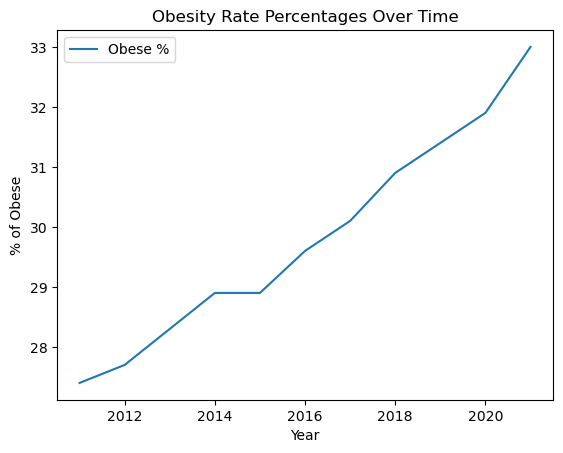

In [42]:
#Show obesity rates over time
lines = timeline_df.plot.line(x='YearEnd', y='Data_Value')
plt.title("Obesity Rate Percentages Over Time")
plt.legend(['Obese %'], loc="upper left")
plt.xlabel("Year")
plt.ylabel("% of Obese")

plt.savefig("Images/Obesity_Rate_Overall.png")
plt.show()

In [20]:
#Gender over time dataframe
gender_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

gender_df = gender_df[gender_df['Question']=='Percent of adults aged 18 years and older who have obesity']
gender_df = gender_df[gender_df['LocationAbbr'] == 'US']
gender_df = gender_df[gender_df['StratificationCategory1'] == 'Gender']
gender_df = gender_df.sort_values(by='YearEnd', ascending=True)

male_gender_df = gender_df[gender_df['Stratification1'] == 'Male']
female_gender_df = gender_df[gender_df['Stratification1'] == 'Female']

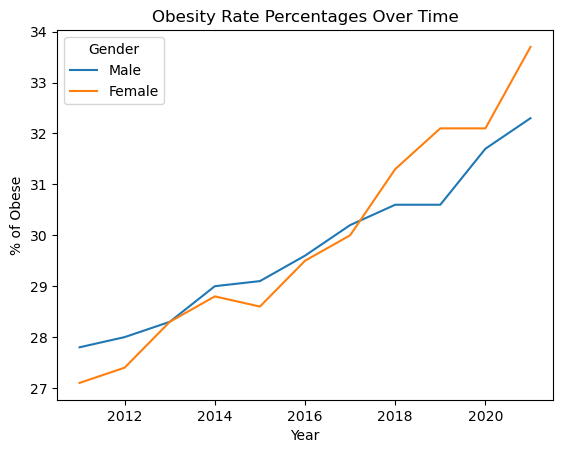

In [41]:
#Gender over time
plt.title("Obesity Rate Percentages Over Time")
plt.xlabel("Year")
plt.ylabel("% of Obese")

plt.plot(male_gender_df['YearEnd'],male_gender_df['Data_Value'])
plt.plot(female_gender_df['YearEnd'],female_gender_df['Data_Value'])

plt.legend(['Male', 'Female'], loc='upper left', title='Gender')

plt.savefig("Images/Obesity_Rate_Over_Time_Gender.png")
plt.show()

In [23]:
#Start fruit and veggie comparision

fruit_veggie_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['YearEnd'] == 2021]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['LocationAbbr'] != 'US']
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['StratificationCategory1'] == 'Race/Ethnicity']
fruit_veggie_df = fruit_veggie_df.sort_values(by='LocationAbbr', ascending=True)

fruit_df = fruit_veggie_df[fruit_veggie_df['Question'] =='Percent of adults who report consuming fruit less than one time daily']
veggie_df = fruit_veggie_df[fruit_veggie_df['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']


In [71]:
fruit_merged_veggie = pd.merge(fruit_df, veggie_df, on=["LocationAbbr", "Stratification1"])
fruit_merged_veggie.rename(columns={'YearEnd_x': 'YearEnd', 'Data_Value_x': 'Data_Value_fruit','Data_Value_y': 'Data_Value_veggie'}, inplace=True)
fruit_merged_veggie = fruit_merged_veggie[fruit_merged_veggie['Data_Value_fruit'].notna()]
fruit_merged_veggie = fruit_merged_veggie[fruit_merged_veggie['Data_Value_veggie'].notna()]

fruit_merged_veggie = fruit_merged_veggie.loc[:,['YearEnd','LocationAbbr','Question_x','Data_Value_fruit','Data_Value_veggie','Stratification1']]

fruit_merged_veggie.head()

,YearEnd,LocationAbbr,Question_x,Data_Value_fruit,Data_Value_veggie,Stratification1
0,2021,AK,Percent of adults who report consuming fruit l...,51.1,26.7,American Indian/Alaska Native
1,2021,AK,Percent of adults who report consuming fruit l...,53.4,27.5,Asian
2,2021,AK,Percent of adults who report consuming fruit l...,40.2,16.4,Non-Hispanic White
3,2021,AK,Percent of adults who report consuming fruit l...,21.9,18.9,Other
4,2021,AK,Percent of adults who report consuming fruit l...,35.4,17.2,Non-Hispanic Black


Linear regression line: y = 0.05x + 19.87
The r-squared is: 0.001787456938530391


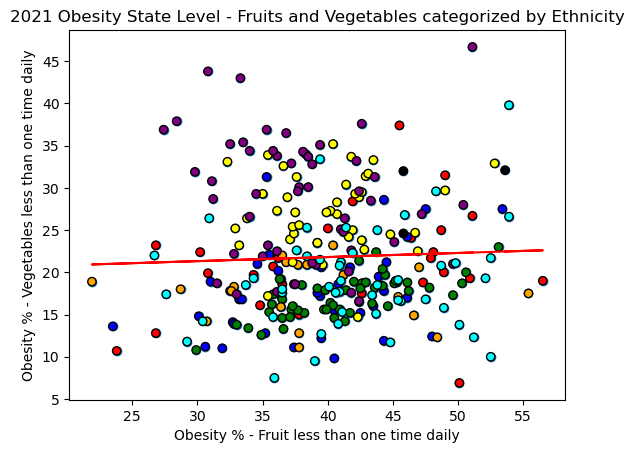

In [80]:
# Build dataframe for colored chart. Show color plot

list_of_ethnic = fruit_merged_veggie['Stratification1'].unique()
color_df = pd.DataFrame({'Stratification1':list_of_ethnic,
                         'Color':['red','blue','green','orange','yellow','purple','cyan','black']})  

fv_color_merged = pd.merge(fruit_merged_veggie, color_df, on=["Stratification1"])
fv_color_merged.dropna()

x_values = fv_color_merged['Data_Value_fruit']
y_values = fv_color_merged['Data_Value_veggie']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")

labels = color_df

plt.scatter(fv_color_merged['Data_Value_fruit'], fv_color_merged['Data_Value_veggie'], marker="o", facecolors=fv_color_merged['Color'], edgecolors="black", label=labels)
plt.xlabel("Obesity % - Fruit less than one time daily")
plt.ylabel("Obesity % - Vegetables less than one time daily")
plt.title("2021 Obesity State Level - Fruits and Vegetables categorized by Ethnicity")
#plt.legend()

print(f"Linear regression line: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Obesity_Fruits_Veggies_Scatter.png")
plt.show()

In [81]:
color_df

,Stratification1,Color
0,American Indian/Alaska Native,red
1,Asian,blue
2,Non-Hispanic White,green
3,Other,orange
4,Non-Hispanic Black,yellow
5,Hispanic,purple
6,2 or more races,cyan
7,Hawaiian/Pacific Islander,black


In [79]:
fruit_merged_veggie.to_excel("output/Obesity_Fruits_Veggies_Scatter.xlsx")